Join together and summarize all CCA notebooks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/userdata/jgauthier/projects/ideal-word-representations


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import re
from typing import Union, Callable

from src.utils import concat_csv_with_indices

In [4]:
df = concat_csv_with_indices("outputs/notebooks/librispeech-train-clean-100/**/word_id/*.csv",
                        [r"cca_scores-(.+?)\.csv$", lambda p: p.parents[1].name,
                         lambda p: p.parents[2].name, lambda p: p.parents[3].name,
                         lambda p: p.parents[4].name],
                        ["agg_method", "equivalence", "model", "base_model", "dataset"]).reset_index()

In [5]:
# we care about correlation between embeddings and the aligned space
df = df[df.measure == "pw_x"]

In [6]:
df["trace"] = df.base_model + "/" + df.model + "/" + df.equivalence
df["trace2"] = df.dataset + "/" + df.equivalence
df["is_study"] = df.trace.str.contains("hinge-mAP")

In [7]:
dynamic_methods = df.dropna().groupby("agg_method").apply(lambda xs: xs.frame_idx.max() > 0)
dynamic_methods, static_methods = dynamic_methods[dynamic_methods].index, dynamic_methods[~dynamic_methods].index

/tmp/ipykernel_947108/952241729.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dynamic_methods = df.dropna().groupby("agg_method").apply(lambda xs: xs.frame_idx.max() > 0)


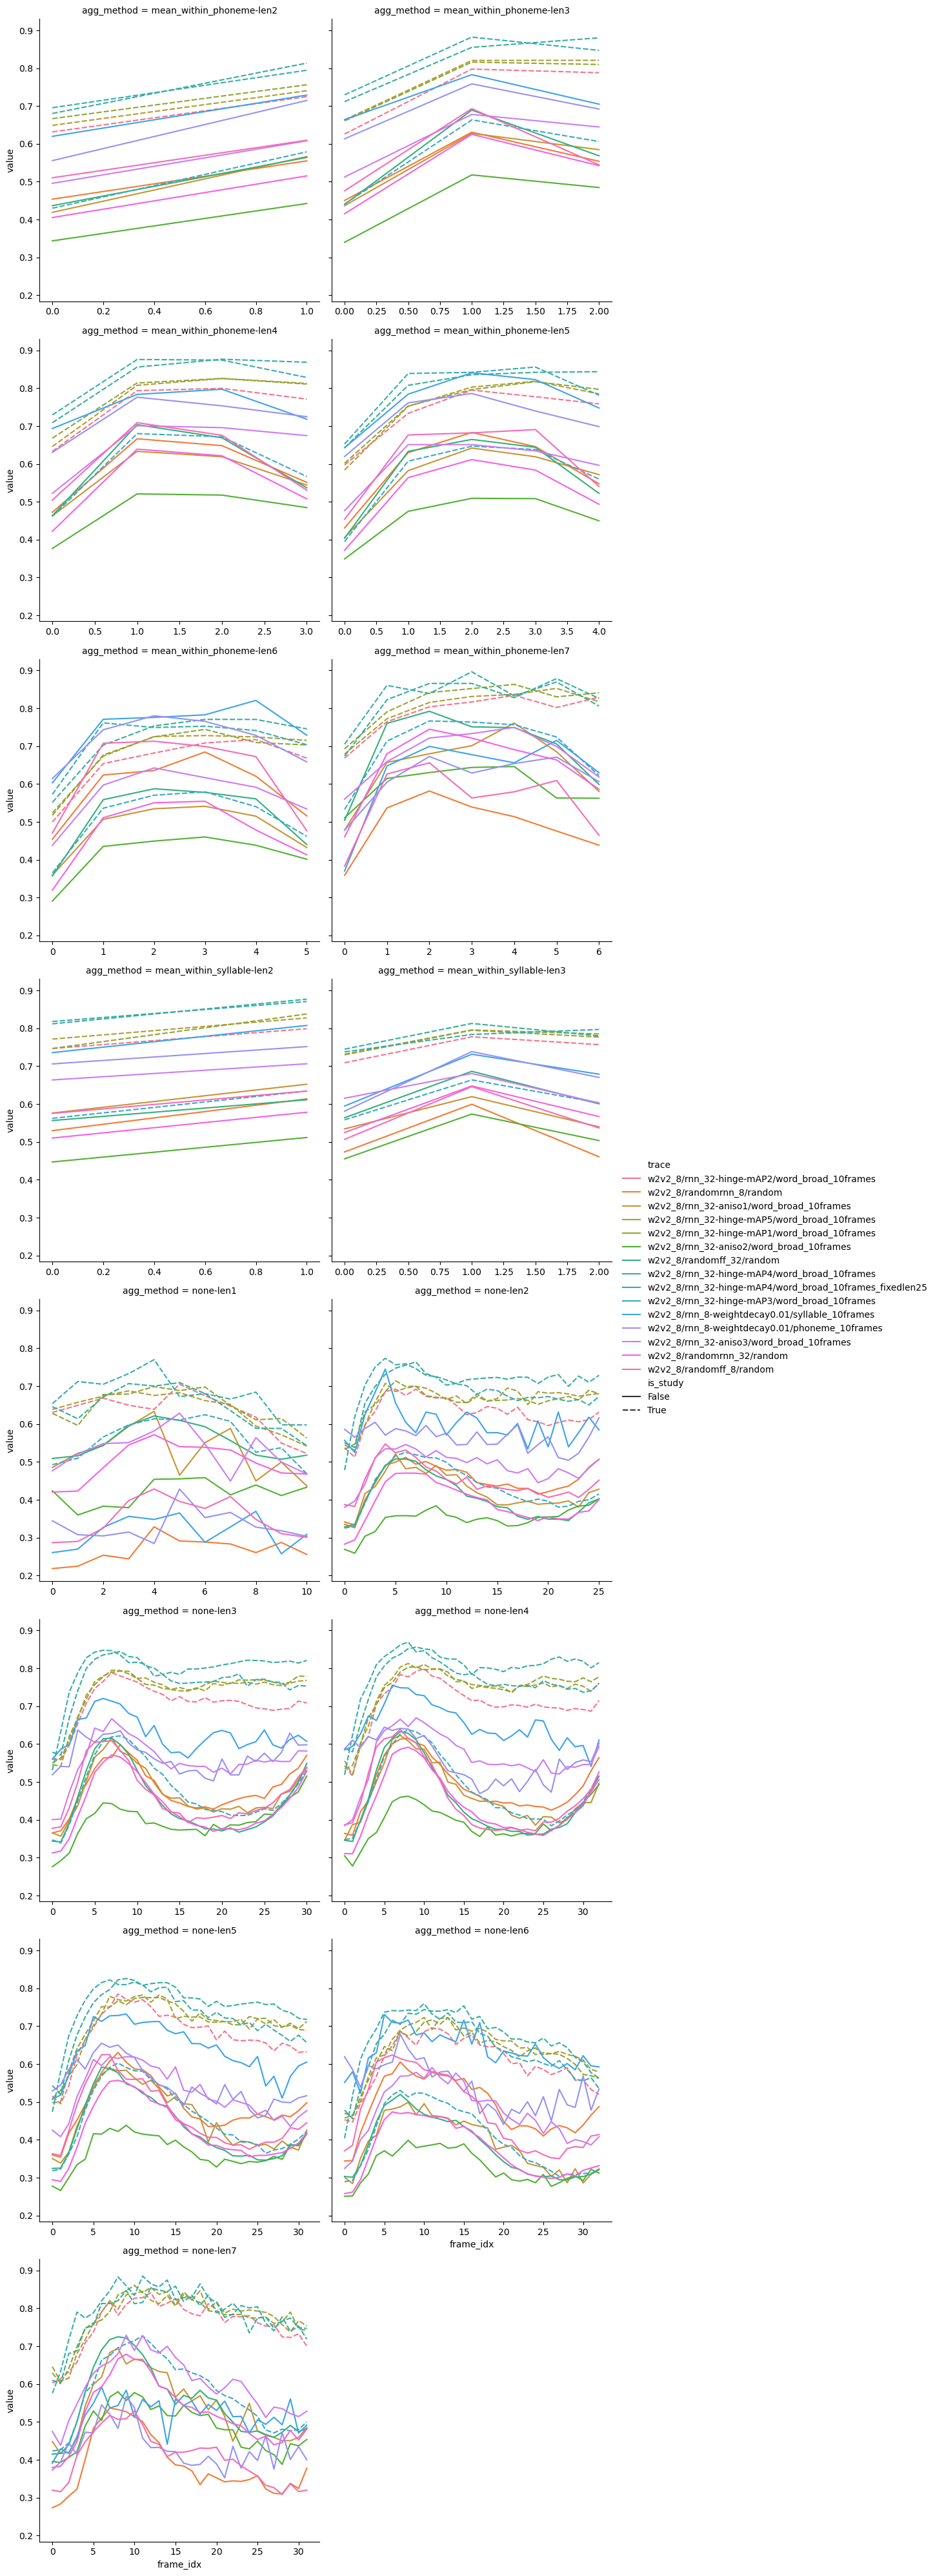

In [8]:
sns.relplot(data=df[df.agg_method.isin(dynamic_methods)].dropna(), x="frame_idx", y="value", hue="trace", style="is_study",
            col="agg_method", col_wrap=2, col_order=sorted(dynamic_methods), errorbar=None,
            kind="line", facet_kws={"sharex": False})

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

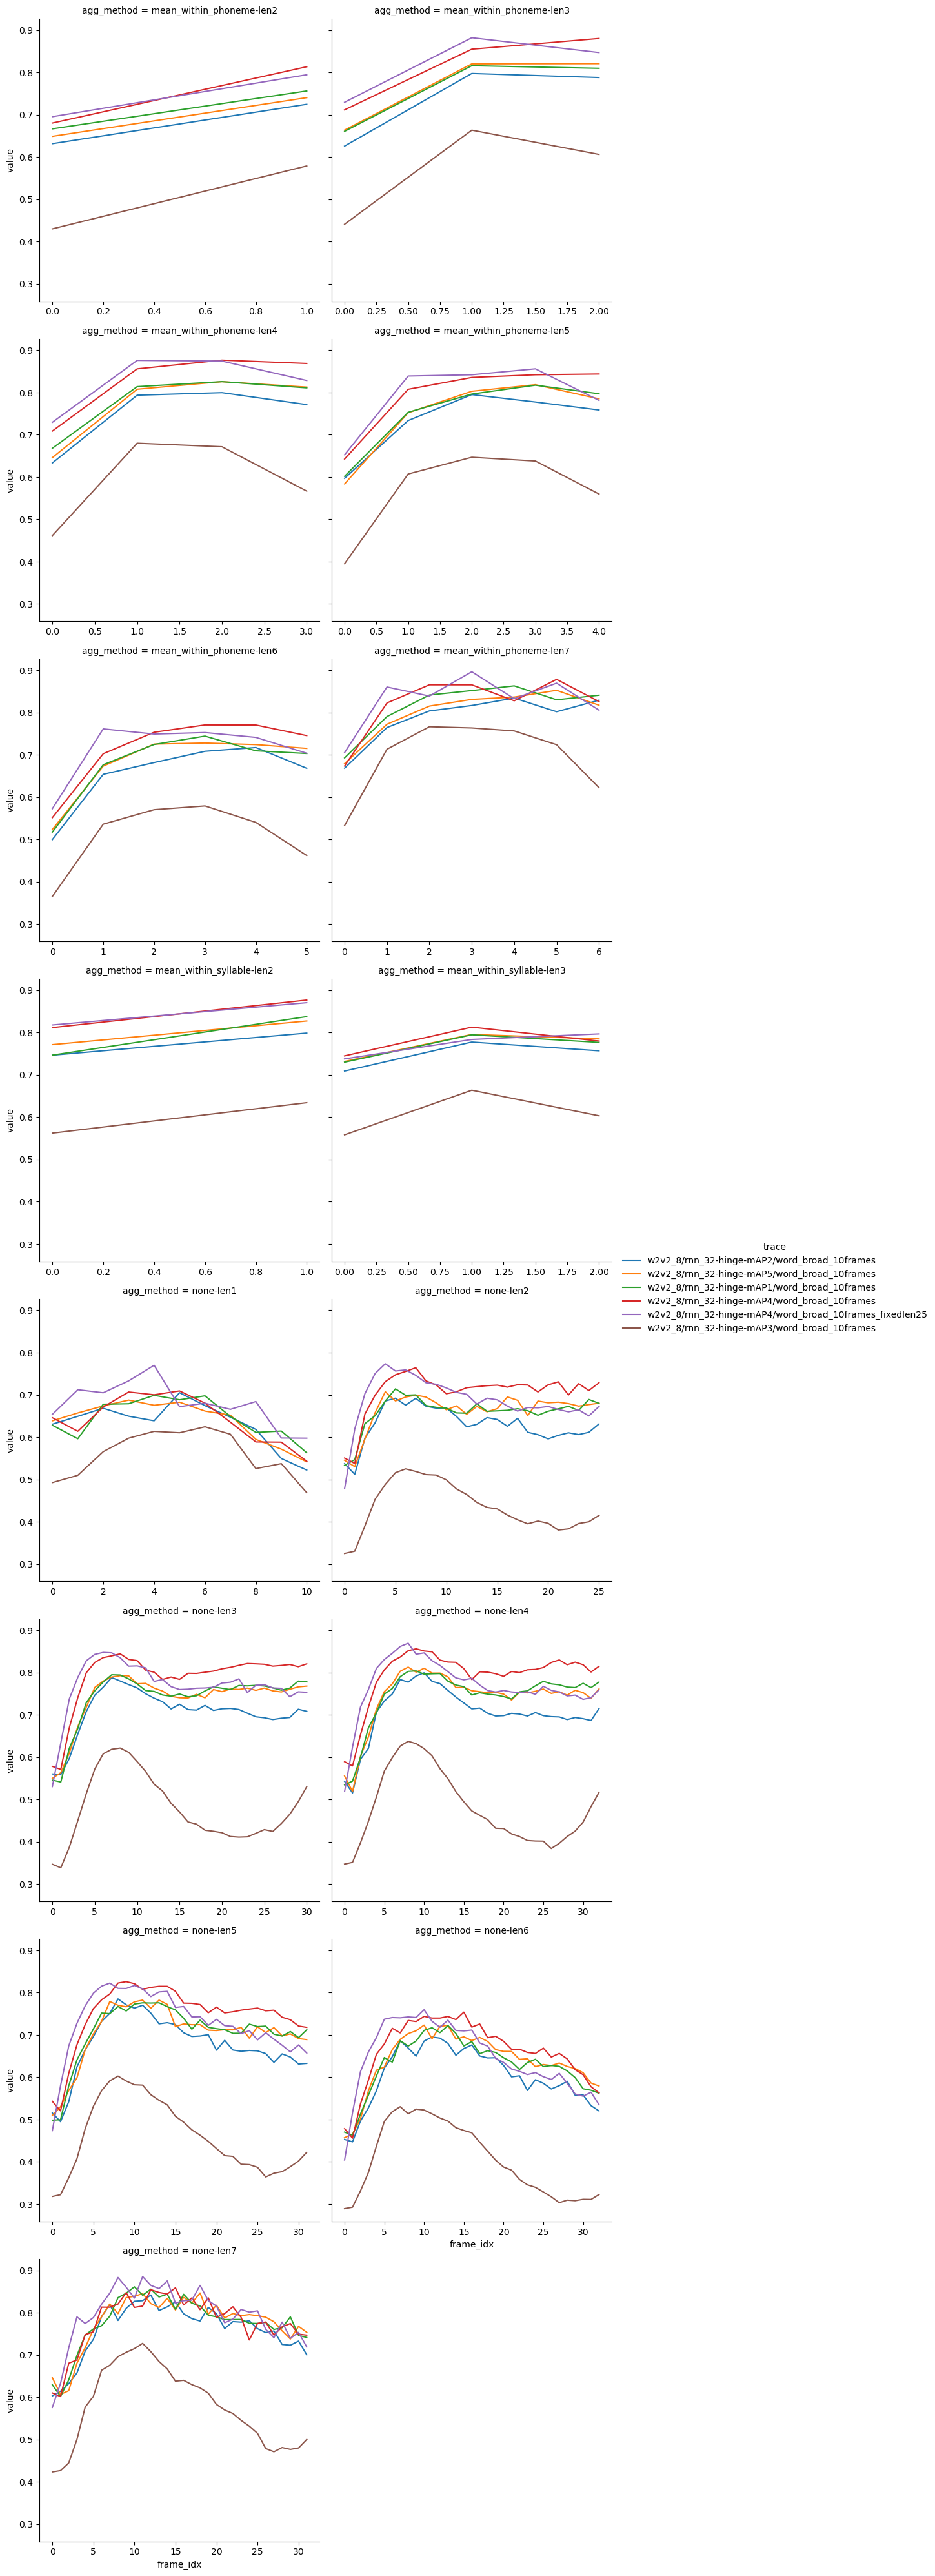

In [9]:
sns.relplot(data=df[df.agg_method.isin(dynamic_methods) & df.is_study].dropna(), x="frame_idx", y="value", hue="trace",
            col="agg_method", col_wrap=2, col_order=sorted(dynamic_methods), errorbar=None,
            kind="line", facet_kws={"sharex": False})

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

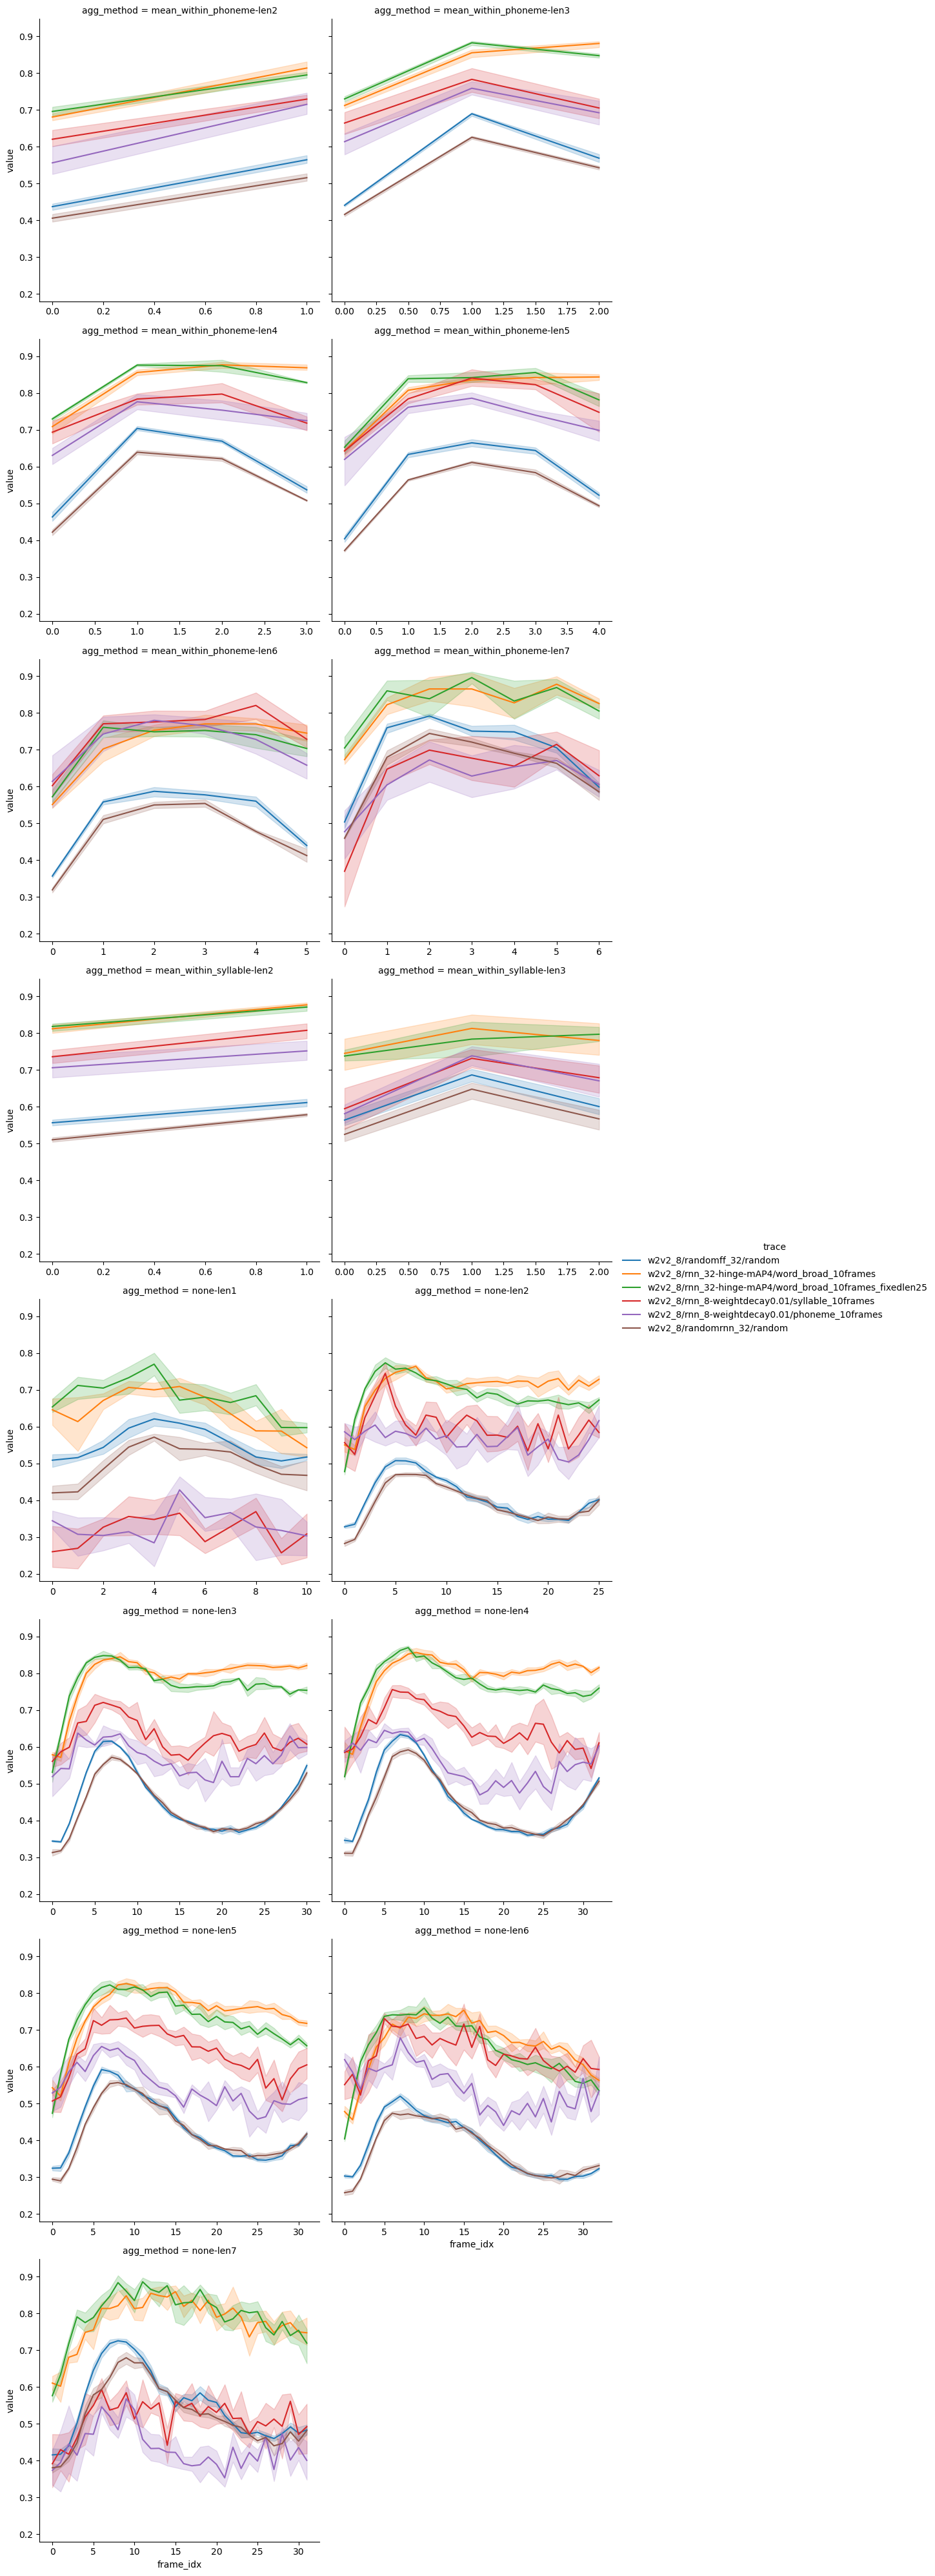

In [10]:
drop_traces = {"w2v2_8/rnn_32-aniso1/word_broad_10frames",
               "w2v2_8/rnn_32-aniso2/word_broad_10frames",
               "w2v2_8/rnn_32-aniso3/word_broad_10frames",
               "w2v2_8/randomff_8/random",
               "w2v2_8/randomrnn_8/random",
               "w2v2_8/rnn_32-hinge-mAP1/word_broad_10frames",
               "w2v2_8/rnn_32-hinge-mAP2/word_broad_10frames",
               "w2v2_8/rnn_32-hinge-mAP3/word_broad_10frames",
               "w2v2_8/rnn_32-hinge-mAP5/word_broad_10frames",}
sns.relplot(data=df[df.agg_method.isin(dynamic_methods) & (~df.trace.isin(drop_traces))].dropna(), x="frame_idx", y="value", hue="trace",
            col="agg_method", col_wrap=2, col_order=sorted(dynamic_methods),
            kind="line", facet_kws={"sharex": False})

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

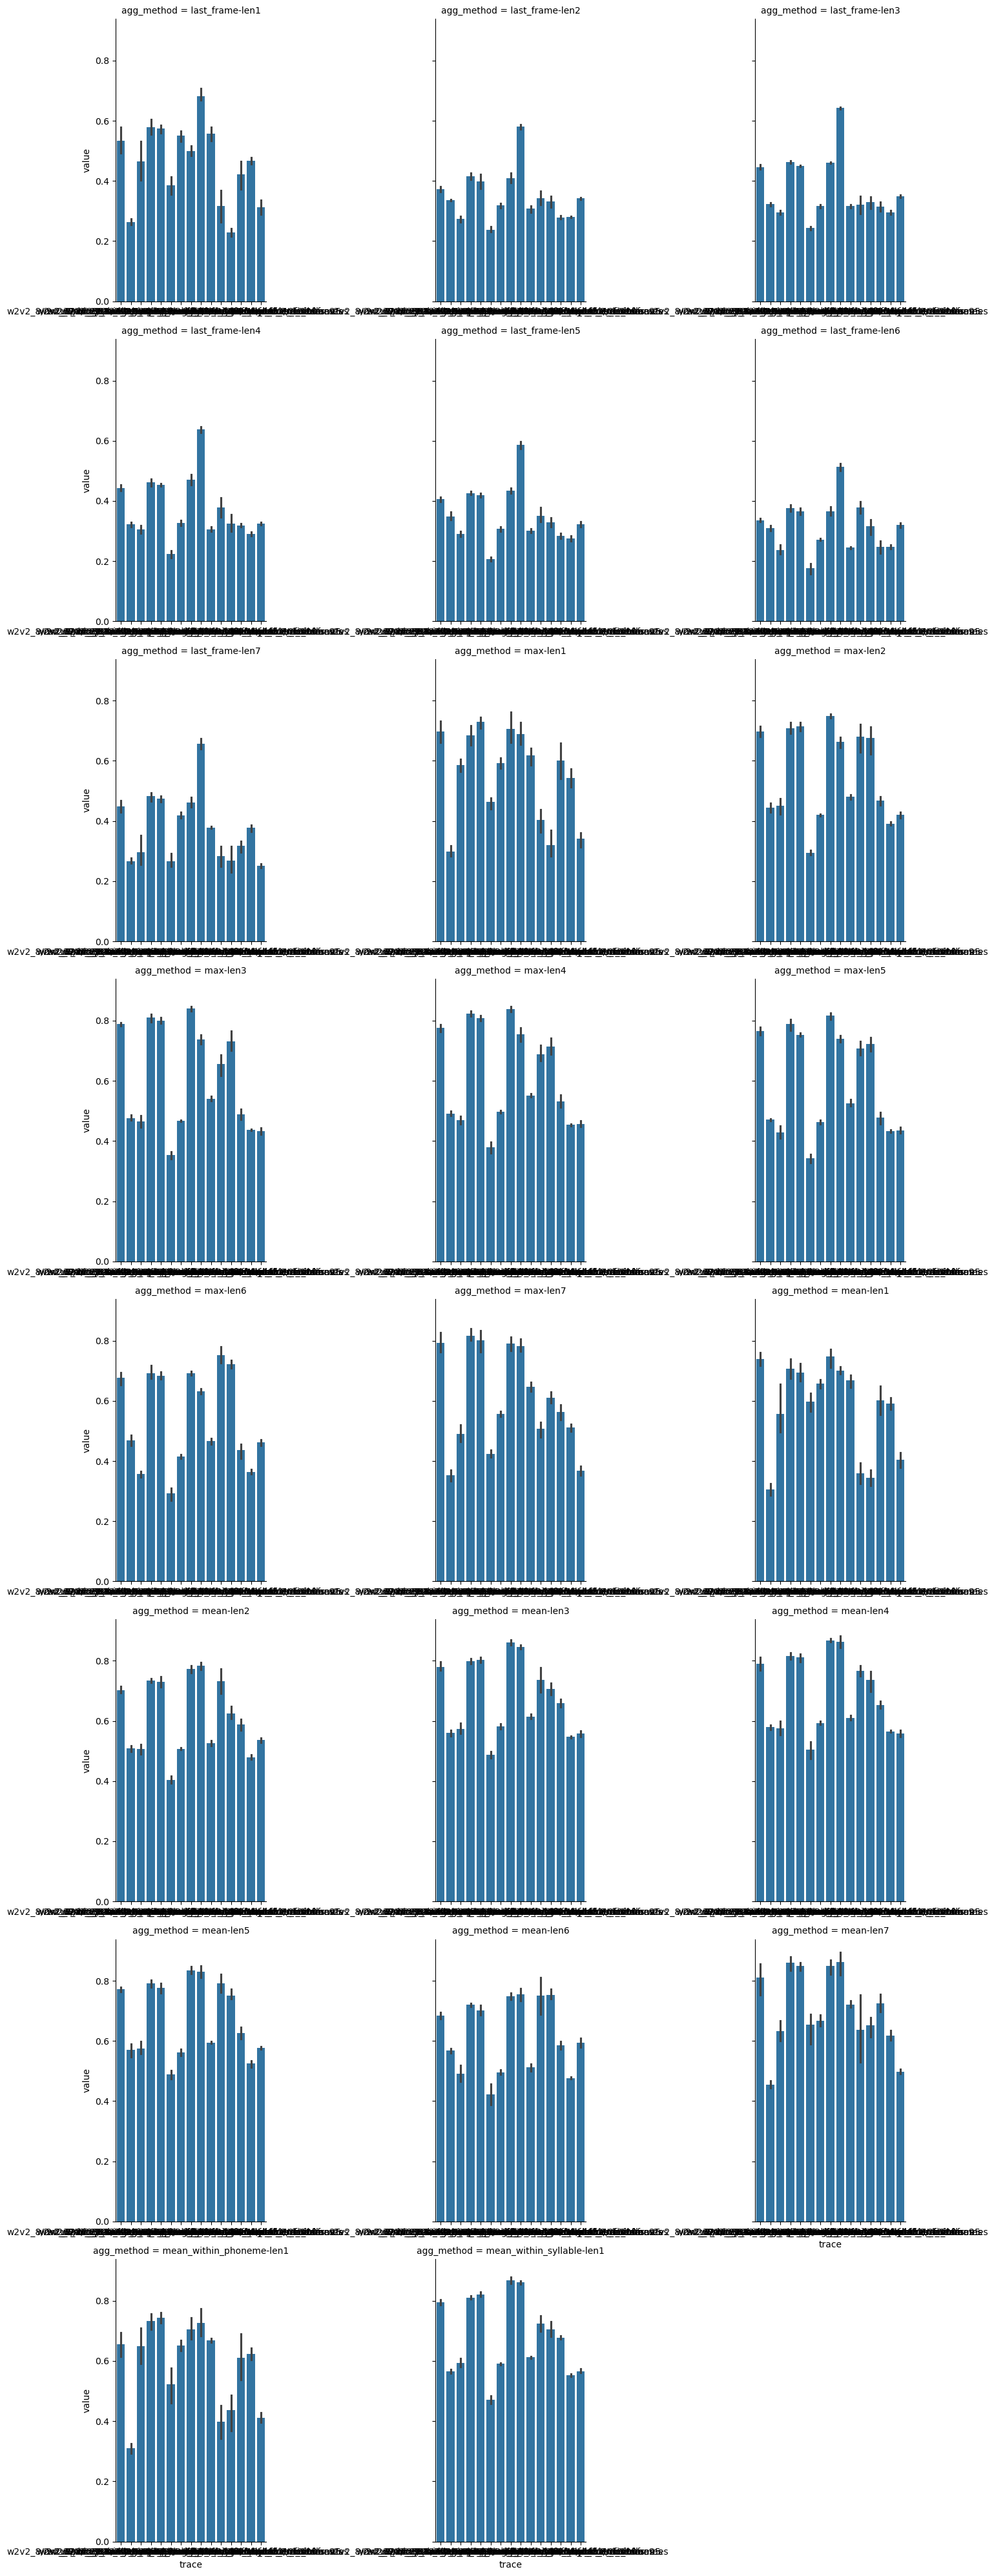

In [11]:
sns.catplot(data=df[df.agg_method.isin(static_methods)].dropna(), kind="bar",
            col="agg_method", col_wrap=3, col_order=sorted(static_methods), sharex=False,
            x="trace", y="value")

## Summarize mean within phoneme results

as fraction progress through words

/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/transformers/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jgauthier/u/tran

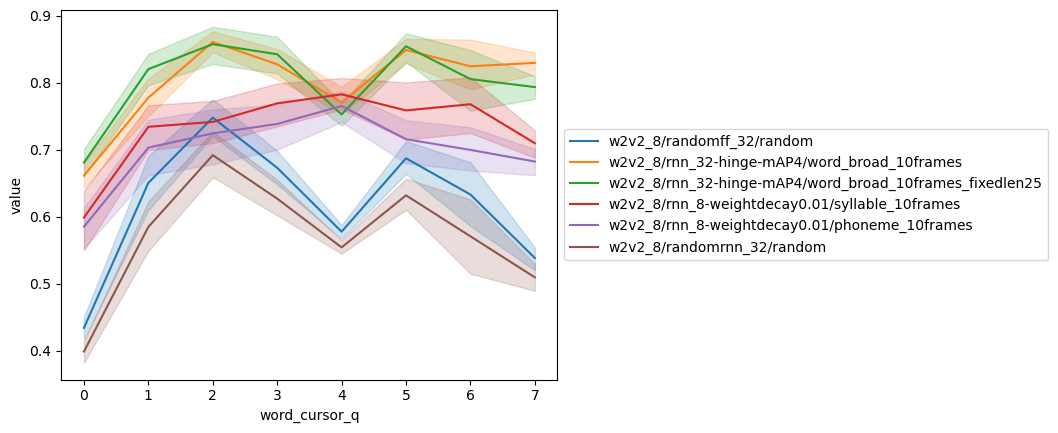

In [12]:
mwp_df = df[df.agg_method.str.startswith("mean_within_phoneme") & (~df.trace.isin(drop_traces))].dropna()
mwp_df["word_length"] = mwp_df.agg_method.str.extract(r"mean_within_phoneme-len(\d+)").astype(int)
mwp_df["word_cursor"] = mwp_df.frame_idx / (mwp_df.word_length - 1)
mwp_df["word_cursor_q"] = pd.cut(mwp_df.word_cursor, bins=8, labels=False)

ax = sns.lineplot(data=mwp_df, x="word_cursor_q", y="value", hue="trace")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))